# Machine Learning Model

In [1]:
#importing libraries
import pandas as pd #Used for importing dataset and managing dataset
import numpy as np #contains mathematical tools
import matplotlib.pyplot as plt #used for making plots
import sklearn #is used for importing essential algorithms like Naives Bayes, Regression etc.
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
#importing bank data
data = pd.read_csv('bank-additional.csv', sep =';')
data = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,no


In [3]:
#head function will display the top 5 rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [4]:
#tail function will display the last 5 rows 
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,no


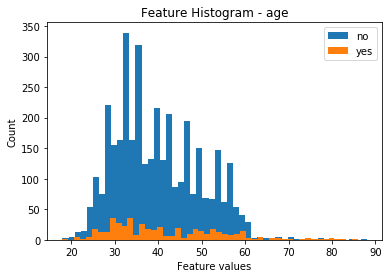

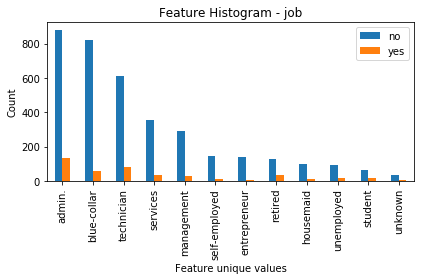

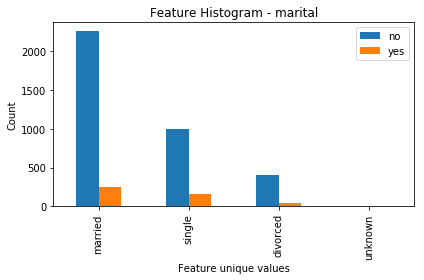

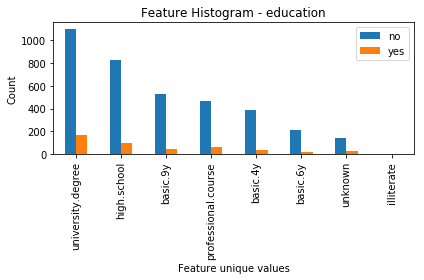

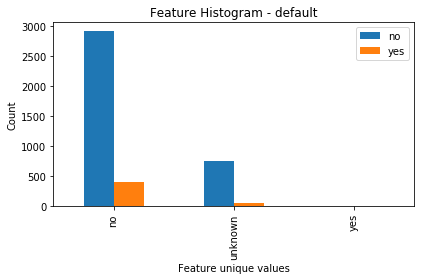

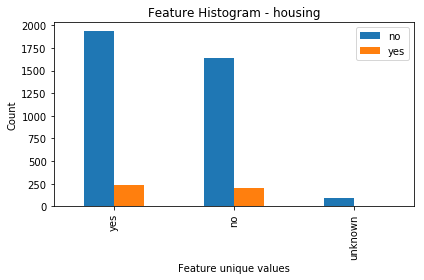

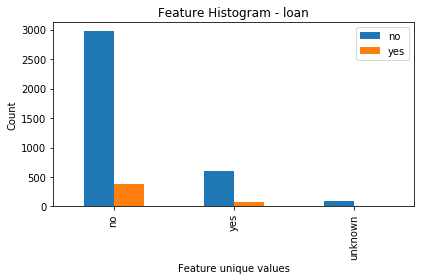

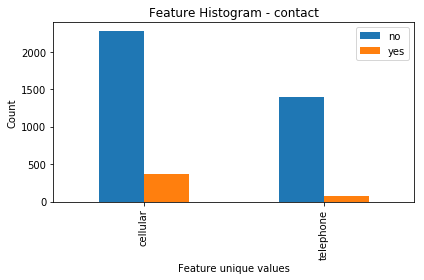

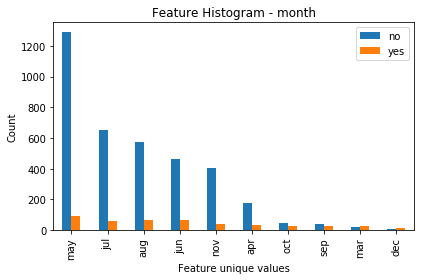

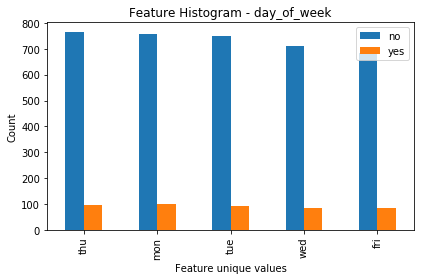

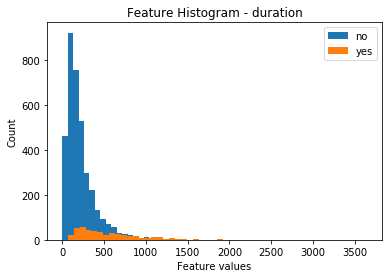

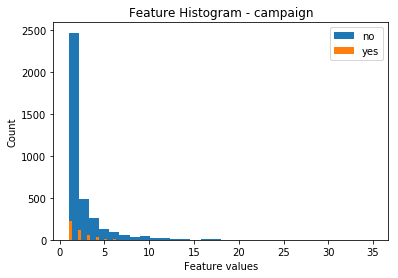

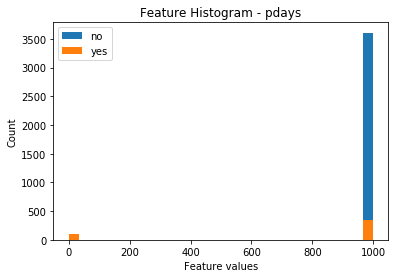

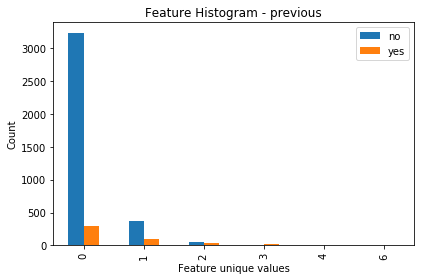

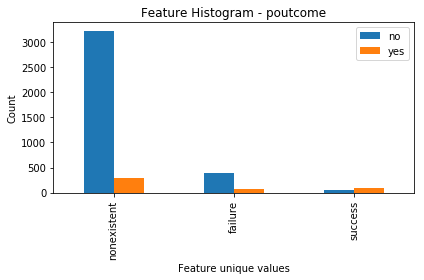

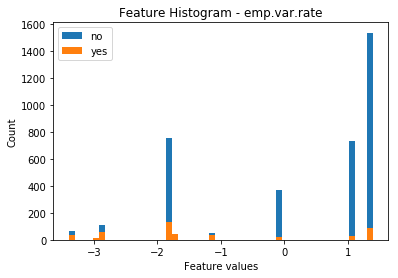

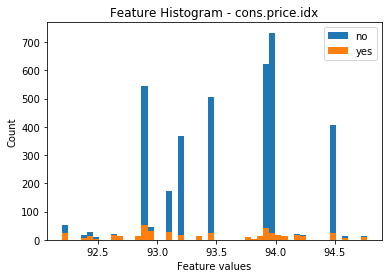

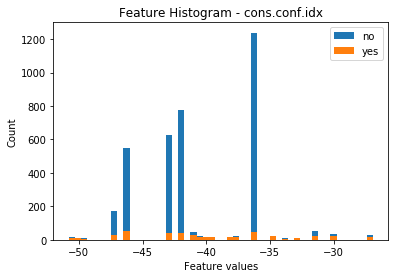

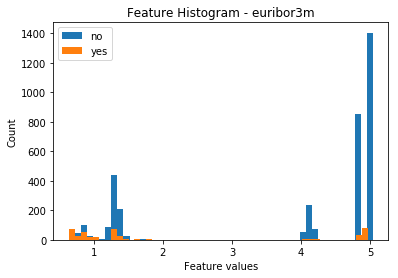

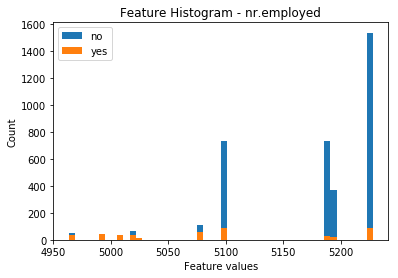

In [5]:
class understanding_data:

    def __init__(self, df):
        self.df = df
        self.df_grouped = df.groupby("y")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.df_grouped_no = self.df_grouped.get_group(self.class_name_no)
        self.df_grouped_yes = self.df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - " + feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.df_grouped_yes[feature_name].value_counts()

        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - " + feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()
        
df = pd.read_csv('bank-additional.csv', sep=';')
understanding_data_obj = understanding_data(df)

### Feature 1 - AGE
understanding_data_obj.plot_histogram_continuous("age", 50)

### Feature 2 - JOB
understanding_data_obj.plot_histogram_categorical("job")

### Feature 3 - MARITAL
understanding_data_obj.plot_histogram_categorical("marital")

### Feature 4 - EDUCATION
understanding_data_obj.plot_histogram_categorical("education")

### Feature 5 - DEFAULT
understanding_data_obj.plot_histogram_categorical("default")

### Feature 6 - HOUSING
understanding_data_obj.plot_histogram_categorical("housing")

### Feature 7 - LOAN
understanding_data_obj.plot_histogram_categorical("loan")

### Feature 8 - CONTACT
understanding_data_obj.plot_histogram_categorical("contact")

### Feature 9 - MONTH
understanding_data_obj.plot_histogram_categorical("month")

### Feature 10 - DAY OF WEEK
understanding_data_obj.plot_histogram_categorical("day_of_week")

###Feature 11 - Duration
understanding_data_obj.plot_histogram_continuous("duration", 50)

### Feature 12- Campaign
understanding_data_obj.plot_histogram_continuous("campaign", 30)

### Feature 13 - PDAYS
understanding_data_obj.plot_histogram_continuous("pdays", 30)

### Feature 14 - PREVIOUS
understanding_data_obj.plot_histogram_categorical("previous")

### Feature 15 - POUTCOME
understanding_data_obj.plot_histogram_categorical("poutcome")

### Feature 16 - emp.var.rate
understanding_data_obj.plot_histogram_continuous("emp.var.rate", 50)

### Feature 17 - cons.price.idx
understanding_data_obj.plot_histogram_continuous("cons.price.idx", 50)

### Feature 18 - cons.conf.idx
understanding_data_obj.plot_histogram_continuous("cons.conf.idx", 50)

### Feature 19 - euribor3m
understanding_data_obj.plot_histogram_continuous("euribor3m", 50)

### Feature 20 - nr.employed
understanding_data_obj.plot_histogram_continuous("nr.employed", 50)
plt.show()

# Checking and replacing unknown values with NaN

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [7]:
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [8]:
data["marital"].replace(
{
    'unknown':np.nan
        
}, inplace = True)

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [10]:
data["job"].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [11]:
data["job"].replace(
{
    'unknown':np.nan
        
}, inplace = True)

In [12]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [13]:
data["housing"].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [14]:
data["housing"].replace(
{
    'unknown':np.nan
        
}, inplace = True)

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,unknown,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [16]:
data["loan"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
data["loan"].replace(
{
    'unknown':np.nan
        
}, inplace = True)

In [18]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [19]:
data["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

In [20]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [21]:
data["education"].replace({
    'unknown':np.nan
    
}, inplace = True)

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [23]:
data["default"].replace({
    "unknown":np.nan
    
}, inplace = True)

In [24]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [25]:
data.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [26]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [27]:
data.day_of_week.unique()

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [28]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [29]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [30]:
data.isnull().head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [31]:
data.isnull().sum()

age              0
job             39
marital         11
education      167
default        803
housing        105
loan           105
contact          0
month            0
day_of_week      0
y                0
dtype: int64

In [32]:
data[data.job.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
148,53,NaN,married,basic.9y,no,no,yes,cellular,nov,wed,no
229,44,NaN,single,basic.9y,NaN,yes,no,telephone,jun,mon,no
239,55,NaN,married,basic.4y,no,no,yes,cellular,jul,thu,no
344,51,NaN,married,NaN,NaN,yes,no,cellular,aug,fri,no
354,52,NaN,married,basic.6y,no,no,no,telephone,may,fri,no
467,60,NaN,married,university.degree,no,no,yes,telephone,may,thu,no
480,53,NaN,married,NaN,NaN,no,no,cellular,aug,mon,no
499,24,NaN,single,university.degree,no,yes,yes,cellular,jun,tue,no
501,59,NaN,married,NaN,NaN,no,no,telephone,jun,thu,yes
528,43,NaN,married,high.school,NaN,yes,yes,telephone,may,mon,no


In [33]:
data[data.education.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
28,47,admin.,single,NaN,NaN,no,no,telephone,may,thu,no
38,31,technician,single,NaN,no,yes,no,cellular,may,wed,no
39,20,student,single,NaN,no,no,no,cellular,oct,mon,no
62,52,admin.,married,NaN,no,yes,no,telephone,apr,wed,yes
66,49,technician,divorced,NaN,no,yes,yes,cellular,oct,thu,no
99,52,admin.,married,NaN,no,no,no,cellular,aug,tue,no
103,38,admin.,single,NaN,no,yes,no,cellular,may,fri,no
129,33,self-employed,divorced,NaN,no,no,no,telephone,may,wed,no
157,50,services,married,NaN,no,yes,no,cellular,aug,thu,no
158,47,technician,single,NaN,no,no,no,cellular,jul,tue,no


In [34]:
data[data.marital.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
272,57,retired,NaN,basic.4y,no,no,no,telephone,may,tue,no
882,35,self-employed,NaN,university.degree,no,no,no,cellular,nov,thu,no
1049,37,unemployed,NaN,university.degree,no,no,no,cellular,jun,tue,no
1289,59,retired,NaN,university.degree,NaN,no,no,telephone,may,tue,no
1644,36,admin.,NaN,university.degree,no,yes,no,cellular,aug,wed,yes
1857,29,technician,NaN,high.school,no,yes,no,cellular,aug,wed,no
2532,56,blue-collar,NaN,basic.4y,no,no,no,cellular,apr,fri,no
2547,34,services,NaN,high.school,no,yes,yes,cellular,may,tue,no
2798,34,admin.,NaN,university.degree,no,yes,no,cellular,jul,thu,no
3000,31,admin.,NaN,high.school,no,no,no,telephone,may,mon,no


In [35]:
data[data.default.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
7,41,entrepreneur,married,university.degree,NaN,yes,no,cellular,nov,mon,no
9,35,blue-collar,married,basic.9y,NaN,no,no,telephone,may,thu,no
10,25,services,single,basic.6y,NaN,yes,no,cellular,jul,thu,no
18,45,entrepreneur,married,university.degree,NaN,yes,yes,cellular,aug,mon,no
20,55,services,married,basic.6y,NaN,yes,no,cellular,jul,tue,no
24,44,technician,married,professional.course,NaN,yes,no,telephone,may,fri,no
27,28,blue-collar,married,basic.6y,NaN,no,no,cellular,may,mon,no
28,47,admin.,single,NaN,NaN,no,no,telephone,may,thu,no
31,33,services,married,high.school,NaN,yes,no,telephone,jun,mon,no
33,30,blue-collar,single,basic.4y,NaN,yes,no,telephone,jun,tue,no


In [36]:
data[data.housing.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
41,38,blue-collar,married,basic.9y,NaN,NaN,NaN,telephone,jun,fri,no
87,47,services,single,basic.9y,no,NaN,NaN,telephone,jun,thu,yes
173,41,services,single,high.school,NaN,NaN,NaN,cellular,may,mon,no
375,31,technician,single,professional.course,no,NaN,NaN,cellular,aug,mon,no
386,32,services,married,high.school,no,NaN,NaN,telephone,may,mon,no
422,36,technician,married,professional.course,no,NaN,NaN,telephone,may,tue,no
465,36,housemaid,married,basic.4y,no,NaN,NaN,cellular,aug,tue,no
468,32,services,single,high.school,no,NaN,NaN,cellular,may,wed,no
474,44,blue-collar,married,basic.4y,no,NaN,NaN,telephone,jun,thu,no


In [37]:
data[data.loan.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,no
41,38,blue-collar,married,basic.9y,NaN,NaN,NaN,telephone,jun,fri,no
87,47,services,single,basic.9y,no,NaN,NaN,telephone,jun,thu,yes
173,41,services,single,high.school,NaN,NaN,NaN,cellular,may,mon,no
375,31,technician,single,professional.course,no,NaN,NaN,cellular,aug,mon,no
386,32,services,married,high.school,no,NaN,NaN,telephone,may,mon,no
422,36,technician,married,professional.course,no,NaN,NaN,telephone,may,tue,no
465,36,housemaid,married,basic.4y,no,NaN,NaN,cellular,aug,tue,no
468,32,services,single,high.school,no,NaN,NaN,cellular,may,wed,no
474,44,blue-collar,married,basic.4y,no,NaN,NaN,telephone,jun,thu,no


# Handling Missing Values

In [38]:
#using fillna to replace the values in the dataframe that have NaN values, to make the model more efficient
data = data.fillna(method="ffill", limit = 2)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,no
7,41,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,no
9,35,blue-collar,married,basic.9y,no,no,no,telephone,may,thu,no


In [39]:
#using the interpolate method. This will interpolate the values by getting a better guess for missing values by replacing with an intermediate value 
data = data.interpolate()
data.interpolate()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,no
7,41,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,no
9,35,blue-collar,married,basic.9y,no,no,no,telephone,may,thu,no


# Encoding categorical data

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,no


In [41]:
#Checking number of disctinct occurrences for values in a colunm
data['job'].value_counts()

admin.           1017
blue-collar       892
technician        704
services          396
management        326
retired           167
self-employed     160
entrepreneur      149
unemployed        112
housemaid         112
student            84
Name: job, dtype: int64

In [42]:
data['education'].value_counts()

university.degree      1309
high.school             972
basic.9y                601
professional.course     557
basic.4y                435
basic.6y                244
illiterate                1
Name: education, dtype: int64

In [43]:
data['month'].value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

In [44]:
data['marital'].value_counts()

married     2515
single      1156
divorced     448
Name: marital, dtype: int64

In [45]:
data['day_of_week'].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

#Thresholding values in columns by counts. 
A recurring problem with some of the columns such as education in the dataset are rare categories. One hot encoding will create a new feature for every rare category and this will create many redundant parameters. I will deal with this by setting a count threshold. Categories that are counted more times than the threshold will be left as is, and the others will be labeled as 'rare'. The count threshold will be a hyperparameter for this model as it is hard to predict what will be the best value for it.


In [46]:
instances = data.shape[0]
threshold = instances*0.005
print ('The minimum count threshold is: ' +str(threshold))

The minimum count threshold is: 20.595


In [47]:
#applying the minimum threshold to all the categoricals values
oj_columns = list(data.select_dtypes(include=['object']).columns)
oj_columns.remove('y') #as this is the target column, it should not be one hot encoded
data = data.apply(lambda x: x.mask(x.map(x.value_counts())<threshold, 'Rare')if x.name in oj_columns else x)

In [48]:
le = preprocessing.LabelEncoder()
data['y'] = le.fit_transform(data['y'])
#one hot encoding on all the dataset 

df_encoded = pd.get_dummies(data=data, columns=oj_columns)
df_encoded.head(15)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,39,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,25,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,38,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,47,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,32,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6,32,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,41,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8,31,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9,35,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [49]:
df_encoded.describe()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,0.109493,0.246905,0.216557,0.036174,0.027191,0.079145,0.040544,0.038844,0.096140,...,0.011653,0.334547,0.108279,0.016752,0.015538,0.186453,0.207575,0.208789,0.204176,0.193008
std,10.313362,0.312294,0.431263,0.411948,0.186745,0.162660,0.269998,0.197255,0.193247,0.294819,...,0.107333,0.471889,0.310770,0.128355,0.123693,0.389519,0.405620,0.406492,0.403147,0.394707
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#correlations
df_encoded.corr()


,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,0.060374,-0.103055,-0.038487,0.040608,0.092973,0.066536,0.411821,0.010700,-0.047360,...,0.018766,-0.047680,0.007677,0.059281,0.038781,-0.002192,0.025359,-0.005081,0.043129,-0.062716
y,0.060374,1.000000,0.040832,-0.065438,-0.034620,-0.001258,-0.016400,0.077716,-0.018183,-0.022047,...,0.164775,-0.100321,-0.014597,0.105684,0.119395,-0.002177,0.008404,0.003513,-0.002089,-0.007972
job_admin.,-0.103055,0.040832,1.000000,-0.301039,-0.110927,-0.095728,-0.167864,-0.117703,-0.115108,-0.186741,...,-0.004467,-0.049203,-0.003840,0.013001,0.019111,0.026566,0.001245,-0.012935,-0.000903,-0.013252
job_blue-collar,-0.038487,-0.065438,-0.301039,1.000000,-0.101855,-0.087899,-0.154135,-0.108077,-0.105694,-0.171468,...,-0.024136,0.126898,-0.054221,-0.045662,-0.056519,-0.008045,-0.030747,-0.016299,0.012977,0.043067
job_entrepreneur,0.040608,-0.034620,-0.110927,-0.101855,1.000000,-0.032389,-0.056796,-0.039824,-0.038946,-0.063183,...,-0.021036,0.003176,0.078943,-0.015156,-0.013826,0.004068,0.016258,0.025242,-0.017489,-0.028854
job_housemaid,0.092973,-0.001258,-0.095728,-0.087899,-0.032389,1.000000,-0.049014,-0.034368,-0.033610,-0.054526,...,-0.018154,-0.042613,0.004193,0.001440,0.015205,-0.003383,0.013808,-0.005084,0.004193,-0.009898
job_management,0.066536,-0.016400,-0.167864,-0.154135,-0.056796,-0.049014,1.000000,-0.060265,-0.058937,-0.095613,...,-0.006695,-0.017273,0.085958,-0.031259,0.014068,0.007426,-0.003701,0.006494,-0.025793,0.016131
job_retired,0.411821,0.077716,-0.117703,-0.108077,-0.039824,-0.034368,-0.060265,1.000000,-0.041325,-0.067043,...,0.046497,-0.072707,-0.016173,0.117036,0.033891,-0.028880,0.022262,-0.005656,0.027186,-0.016319
job_self-employed,0.010700,-0.018183,-0.115108,-0.105694,-0.038946,-0.033610,-0.058937,-0.041325,1.000000,-0.065564,...,0.013294,0.011910,0.022949,-0.006660,-0.004938,-0.034946,0.021029,0.001836,0.013502,-0.002806
job_services,-0.047360,-0.022047,-0.186741,-0.171468,-0.063183,-0.054526,-0.095613,-0.067043,-0.065564,1.000000,...,-0.020066,0.055017,-0.050036,-0.016901,-0.020996,0.002463,0.032085,0.004701,-0.016046,-0.023855


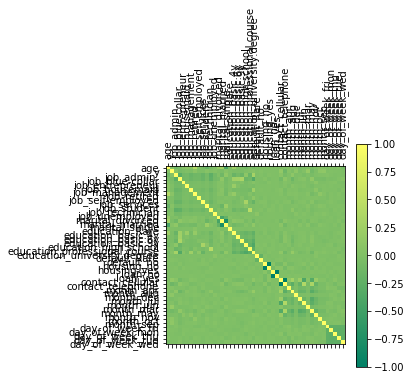

In [51]:

plt.matshow(df_encoded.corr(), cmap = "summer")
plt.colorbar()

plt.xticks(list(range(len(df_encoded.columns))), df_encoded.columns, rotation='vertical')
plt.yticks(list(range(len(df_encoded.columns))), df_encoded.columns, rotation='horizontal')
plt.show()

In [52]:
low = 0.01
high = 0.99
df_encoded.quantile([low, high])

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0.01,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,68.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
quantiles = df_encoded.quantile([low, high])

In [54]:
quantiles.age

0.01    24.0
0.99    68.0
Name: age, dtype: float64

In [55]:
df_encoded.age = df_encoded.age.apply(lambda v: v if quantiles.age[low]< v <quantiles.age[high] else np.nan)

In [56]:
df_encoded.describe()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,3976.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.132797,0.109493,0.246905,0.216557,0.036174,0.027191,0.079145,0.040544,0.038844,0.096140,...,0.011653,0.334547,0.108279,0.016752,0.015538,0.186453,0.207575,0.208789,0.204176,0.193008
std,9.397951,0.312294,0.431263,0.411948,0.186745,0.162660,0.269998,0.197255,0.193247,0.294819,...,0.107333,0.471889,0.310770,0.128355,0.123693,0.389519,0.405620,0.406492,0.403147,0.394707
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_encoded.age.dropna(inplace=True)


In [58]:
df_encoded.describe()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,3976.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.132797,0.109493,0.246905,0.216557,0.036174,0.027191,0.079145,0.040544,0.038844,0.096140,...,0.011653,0.334547,0.108279,0.016752,0.015538,0.186453,0.207575,0.208789,0.204176,0.193008
std,9.397951,0.312294,0.431263,0.411948,0.186745,0.162660,0.269998,0.197255,0.193247,0.294819,...,0.107333,0.471889,0.310770,0.128355,0.123693,0.389519,0.405620,0.406492,0.403147,0.394707
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df_encoded.head(10)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,39.0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,25.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,38.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,47.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,32.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6,32.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,41.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8,31.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9,35.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [60]:
df_encoded.age.unique()

array([30., 39., 25., 38., 47., 32., 41., 31., 35., 36., 29., 27., 44.,
       46., 45., 50., 55., 40., 28., 34., 33., 51., 48., 56., 58., 60.,
       37., 52., 42., 49., 54., 59., 57., 43., 53., 26., 61., 67., 64.,
       63., 66., 62., 65.])

{'whiskers': [<matplotlib.lines.Line2D at 0x17bb649bb38>,
 'caps': [<matplotlib.lines.Line2D at 0x17bb65c0208>,
 'boxes': [<matplotlib.lines.Line2D at 0x17bb649b9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x17bb65c0898>],
 'fliers': [<matplotlib.lines.Line2D at 0x17bb65c0be0>],
 'means': []}

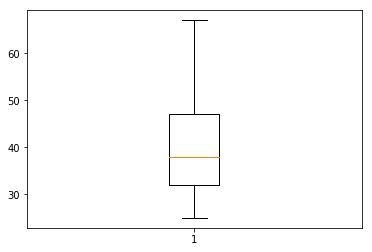

In [61]:
plt.boxplot(df_encoded.age)

In [62]:
df_encoded.cov()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,88.321480,0.050471,-0.421433,-0.078524,0.088674,0.125230,0.185402,0.522265,0.025380,-0.088200,...,-0.013260,-0.177746,0.020487,0.028385,0.013542,-0.007194,0.061159,-0.012634,0.159606,-0.200936
y,0.050471,0.097528,0.005499,-0.008419,-0.002019,-0.000064,-0.001383,0.004787,-0.001097,-0.002030,...,0.005523,-0.014784,-0.001417,0.004236,0.004612,-0.000265,0.001065,0.000446,-0.000263,-0.000983
job_admin.,-0.421433,0.005499,0.185988,-0.053482,-0.008934,-0.006715,-0.019546,-0.010013,-0.009593,-0.023743,...,-0.000207,-0.010013,-0.000515,0.000720,0.001019,0.004463,0.000218,-0.002268,-0.000157,-0.002256
job_blue-collar,-0.078524,-0.008419,-0.053482,0.169702,-0.007836,-0.005890,-0.017144,-0.008782,-0.008414,-0.020825,...,-0.001067,0.024668,-0.006941,-0.002414,-0.002880,-0.001291,-0.005138,-0.002729,0.002155,0.007003
job_entrepreneur,0.088674,-0.002019,-0.008934,-0.007836,0.034874,-0.000984,-0.002864,-0.001467,-0.001405,-0.003479,...,-0.000422,0.000280,0.004581,-0.000363,-0.000319,0.000296,0.001232,0.001916,-0.001317,-0.002127
job_housemaid,0.125230,-0.000064,-0.006715,-0.005890,-0.000984,0.026458,-0.002153,-0.001103,-0.001056,-0.002615,...,-0.000317,-0.003271,0.000212,0.000030,0.000306,-0.000214,0.000911,-0.000336,0.000275,-0.000635
job_management,0.185402,-0.001383,-0.019546,-0.017144,-0.002864,-0.002153,0.072899,-0.003210,-0.003075,-0.007611,...,-0.000194,-0.002201,0.007213,-0.001083,0.000470,0.000781,-0.000405,0.000713,-0.002808,0.001719
job_retired,0.522265,0.004787,-0.010013,-0.008782,-0.001467,-0.001103,-0.003210,0.038909,-0.001575,-0.003899,...,0.000984,-0.006768,-0.000991,0.002963,0.000827,-0.002219,0.001781,-0.000454,0.002162,-0.001271
job_self-employed,0.025380,-0.001097,-0.009593,-0.008414,-0.001405,-0.001056,-0.003075,-0.001575,0.037345,-0.003735,...,0.000276,0.001086,0.001378,-0.000165,-0.000118,-0.002631,0.001648,0.000144,0.001052,-0.000214
job_services,-0.088200,-0.002030,-0.023743,-0.020825,-0.003479,-0.002615,-0.007611,-0.003899,-0.003735,0.086918,...,-0.000635,0.007654,-0.004584,-0.000640,-0.000766,0.000283,0.003837,0.000563,-0.001907,-0.002776


In [63]:
df_encoded.to_csv("/Users/s217016960/Desktop/Python Assignment/preprocessed2.csv", index=False )

# Building Classification Models

In [64]:
df1 = pd.read_csv ("preprocessed2.csv")
df1.head(10)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,39.0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,25.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,38.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,47.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,32.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6,32.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,41.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8,31.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9,35.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
#normalising all ages
columns = ["age"]
df1[columns]=scaler.fit_transform(df1[columns])
df1.head()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.119048,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.333333,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0.000000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.309524,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.523810,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# #Spliting dependent and independent features

In [68]:
#split the dataset to X and Y for model fit
x_orig = df1.fillna(df.median(axis=0))
y_orig = x_orig['y'] #sets the target column
x_orig = x_orig.drop('y', axis=1)#this removes the target column from the training set

# Train-test split
Training data set can be used specifically for our model building. 

The above cells divide data into feature set and target set. The “x_orig ” set consists of predictor variables. It consists of data from columns in the dataset df1. The “y_orig” set consists of the outcome variable. It consists of data in the 'y' column. 

The cell below will split data into training and test set. X_train, y_train are training data and X_test, y_test belongs to the test dataset.
The parameter test_size is given value 0.3; it means test sets will be 30% of whole dataset  and training dataset’s size will be 70% of the entire dataset. Random_state variable is a pseudo-random number generator state used for random sampling. 

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(x_orig), y_orig, test_size=0.3, random_state=42)

In [70]:
y_test 

889     1
2669    0
2707    0
2258    0
2514    1
1829    0
2335    1
2314    0
438     0
3676    0
465     0
2570    0
1775    0
2413    0
3650    0
3218    0
3960    1
948     0
1258    0
2741    0
4081    0
3688    0
2155    0
4078    0
1074    1
3454    0
2462    0
1405    0
3186    0
1572    1
       ..
2984    0
836     0
1293    0
2522    0
4088    1
1370    0
2880    0
1689    0
1070    0
3815    0
2066    0
2528    1
3736    0
1830    0
3129    0
1979    0
3246    0
3199    1
2309    0
2344    0
3619    0
3647    0
1657    0
1514    0
3912    0
1373    0
3497    0
2493    0
3155    0
867     0
Name: y, Length: 1236, dtype: int64

# Decision Tree Training
Fit Decision tree algorithm on training data, predicting labels for validation dataset and printing the accuracy of the model using various parameters.

DecisionTreeClassifier()- This is the classifier function for DecisionTree. It is the main function for implementing the algorithms.
Optimizing Decision Tree Performance - criterion parameter set to gini which allows us to use the different-different attribute selection measure. Max_depth is the maximum depth of the tree. In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning.  

In [71]:
# Train basic Classifer

clf = DecisionTreeClassifier(criterion = "gini", random_state=0, max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [72]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Predictions

In [73]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Calculating Accuracy Score

Classification Accuracy metric will be used. The function accuracy_score() will be used to print accuracy of Decision Tree algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

89.64401294498381

In [76]:
accuracy_score(y_test,y_pred_en)*100

89.80582524271846

# Logistic Regression 

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
#make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

Classfication accuracy: percetange of correct predictions

In [79]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)*100

89.23948220064725

# Evaluation of the classfication model
Confusion Matrix is a table that describes the perfromance of a classification model.
Compute confusion matrix to evaluate the accuracy of a classification.

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

tn: 1088 fp: 17 fn: 111 tp: 20


In [81]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_en).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

tn: 1087 fp: 18 fn: 108 tp: 23


In [82]:
confusion_matrix(y_test, y_pred)

array([[1088,   17],
       [ 111,   20]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1105
           1       0.54      0.15      0.24       131

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.72      0.57      0.59      1236
weighted avg       0.87      0.90      0.87      1236

